In [1]:
!pip install pykalman
!pip install pycaret
!pip install yfinance
!pip install ta
!pip install mxnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48443 sha256=0f009b263684916279c2bbaf2d4017ecbb5a4a843c19c49c91b09caea4c7fb23
  Stored in directory: /root/.cache/pip/wheels/76/33/ef/5f332226e13a5089c6dd4b01cc2bcb59491d18f955fa2d3807
Successfully built pykalman
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.3 M

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from ta import add_all_ta_features

In [3]:
listSymbols = ['^VIX', 'ES=F', 'YM=F', 'NQ=F', 'ZB=F', 'ZN=F', 'ZT=F', 'GC=F', 'SI=F', 'HG=F', 'CL=F', 'HO=F', 'NG=F', 'BZ=F', '^GSPC', '^DJI', '^NYA', '^XAX',
              '^RUT', '^VIX', '^FTSE', '^GDAXI', '^FCHI', '^STOXX50E', '^N100', '^BFX', '^N225', '399001.SZ', '^STI', '^AXJO', '^AORD', '^BSESN', '^JKSE', '^KLSE',
              '^NZ50', '^KS11', '^TWII', '^GSPTSE', '^BVSP', '^MXX', '^IPSA', '^MERV', '^CASE30', '^JN0U.JO', 'EURUSD=X', 'JPY=X', 'GBPUSD=X', 'AUDUSD=X', 'NZDUSD=X', 'EURJPY=X',
              'GBPJPY=X', 'EURGBP=X', 'EURCAD=X', 'EURSEK=X', 'EURCHF=X', 'EURHUF=X', 'EURJPY=X', 'CNY=X', 'HKD=X', 'SGD=X', 'INR=X', 'MXN=X', 'PHP=X', 'IDR=X', 'THB=X', 'MYR=X',
              'ZAR=X', 'RUB=X', 'BTC-USD', 'ETH-USD', '^IRX', '^FVX', '^TNX', '^TYX', 'AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'JPM', 'TSM', 'JNJ', 'XOM',
              'WMT', 'PG', 'ORCL', 'CVX', 'BAC', 'MRK', 'KO', 'PEP', 'BABA', 'CSCO', 'AZN', 'PFE', 'CMCSA', 'CVX', 'AMD', 'NEE', 'MDT', 'SCHW', 'NKE', 'DIS', 'WFC', 'MS', 'VZ',
              'VALE3.SA', 'PETR4.SA', 'ITUB4.SA', 'BBAS3.SA', 'PRIO3.SA', 'B3SA3.SA', 'LREN3.SA', 'GOLL4.SA', 'MGLU3.SA', 'RADL3.SA', 'WEGE3.SA', 'BBDC4.SA', 'USIM5.SA', 'BPAC11.SA',
              'COGN3.SA', 'AZUL4.SA']

target_date = '2023-08-11'

df2 = yf.download('^BVSP', start='2001-01-01', end='2024-01-01').reset_index()
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d')
df2 = df2[['Date', 'Adj Close']]

for i in listSymbols:
  try:
      df2_aux = yf.download(i, start='2001-01-01', end='2024-01-01').reset_index()
      df2_aux['Date'] = df2_aux['Date'].dt.strftime('%Y-%m-%d')

      df2_zero = pd.DataFrame()
      df2_zero['Date'] = df2_aux['Date'].copy()

      conditional = target_date in df2_aux['Date'].values

      if conditional:

        df2_aux = add_all_ta_features(df2_aux, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

        df2_aux = df2_aux.drop(['Date', 'others_dr', 'others_dlr', 'others_cr'], axis=1)

        for column in list(df2_aux.columns):
          df2_zero[f'{i}_{column}'] = df2_aux[column]

        for j in range(2, 20):
          df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)


        close_fft = np.fft.fft(np.asarray(df2_zero[f'{i}_Close'].tolist()))
        fft_df = pd.DataFrame({'fft':close_fft})
        fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
        fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

        fft_list = np.asarray(fft_df['fft'].tolist())
        for num_ in [3, 5, 10, 15, 22]:
            fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
            df_testando = pd.DataFrame(np.fft.ifft(fft_list_m10))
            df_testando[f'fourier_real_{num_}_{i}'] = df_testando[0].apply(lambda x: x.real)
            df_testando[f'fourier_im_{num_}_{i}'] = df_testando[0].apply(lambda x: x.imag)
            df_testando[f'fourier_{num_}_{i}'] = df_testando[f'fourier_real_{num_}_{i}'] + df_testando[f'fourier_im_{num_}_{i}']

            df2_zero[f'fourier_real_{num_}_{i}'] = df_testando[f'fourier_real_{num_}_{i}']
            df2_zero[f'fourier_im_{num_}_{i}'] = df_testando[f'fourier_im_{num_}_{i}']
            df2_zero[f'fourier_{num_}_{i}'] = df_testando[f'fourier_{num_}_{i}']

        df2 = df2_zero.merge(df2, on='Date', how='left')
  except:
    pass

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:812: RuntimeWarning: invalid value encountered in double_scalars
  dip[i + self._window] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.10/dist-packages/ta/trend.py:827: RuntimeWarning: invalid value encountered in double_scalars
  din[i + self._window] = 100 * (self._din[i] / self._trs[i])
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_ze

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:812: RuntimeWarning: invalid value encountered in double_scalars
  dip[i + self._window] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.10/dist-packages/ta/trend.py:827: RuntimeWarning: invalid value encountered in double_scalars
  din[i + self._window] = 100 * (self._din[i] / self._trs[i])
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_ze

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:812: RuntimeWarning: invalid value encountered in double_scalars
  dip[i + self._window] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.10/dist-packages/ta/trend.py:827: RuntimeWarning: invalid value encountered in double_scalars
  din[i + self._window] = 100 * (self._din[i] / self._trs[i])
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:812: RuntimeWarning: invalid value encountered in double_scalars
  dip[i + self._window] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.10/dist-packages/ta/trend.py:827: RuntimeWarning: invalid value encountered in double_scalars
  din[i + self._window] = 100 * (self._din[i] / self._trs[i])
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_ze

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

In [4]:
df_checkpoint1 = df2.copy()

In [5]:
df = yf.download('PETR4.SA', start='2001-01-01', end='2024-01-01').reset_index()
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

df2_copia = df2.copy()

df = df.merge(df2_copia, on='Date', how='left')

for i in range(2, 22):
  df[f'Close{i}'] = df['Close'].shift(i)

df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

df = df.drop(['Date', 'others_dr', 'others_dlr', 'others_cr'], axis=1)

df3 = df.copy()

cols_with_inf = df3.columns[df3.isin([np.inf, -np.inf]).any()]

for col in cols_with_inf:
    for idx, value in df3[df3[col].isin([np.inf, -np.inf])][col].iteritems():
        if idx > 0:
            df3.at[idx, col] = df3.at[idx - 1, col]

cols_with_inf = df3.columns[df3.isin([np.inf, -np.inf]).any()]

for col in cols_with_inf:
    for idx, value in df3[df3[col].isin([np.inf, -np.inf])][col].iteritems():
        if idx > 0:
            df3.at[idx, col] = 0

close_fft = np.fft.fft(np.asarray(df3['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 5, 10, 15, 22]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    df_testando = pd.DataFrame(np.fft.ifft(fft_list_m10))

    df_testando[f'fourier_real_{num_}_Close'] = df_testando[0].apply(lambda x: x.real)
    df_testando[f'fourier_im_{num_}_Close'] = df_testando[0].apply(lambda x: x.imag)
    df_testando[f'fourier_{num_}_Close'] = df_testando[f'fourier_real_{num_}_Close'] + df_testando[f'fourier_im_{num_}_Close']

    df3[f'fourier_real_{num_}_Close'] = df_testando[f'fourier_real_{num_}_Close']
    df3[f'fourier_im_{num_}_Close'] = df_testando[f'fourier_im_{num_}_Close']
    df3[f'fourier_{num_}_Close'] = df_testando[f'fourier_{num_}_Close']

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/wrapper.py:431: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{colprefix}momentum_stoch_rsi_d"] = indicator_srsi.stochrsi_d()
/usr/local/lib/python3.10/dist-packages/ta/wrapper.py:434: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inst

In [6]:
df4 = df3.copy()

In [7]:
df4

,Open,High,Low,Close,Adj Close_x,Volume,AZUL4.SA_Open,AZUL4.SA_High,AZUL4.SA_Low,AZUL4.SA_Close,...,fourier_5_Close,fourier_real_10_Close,fourier_im_10_Close,fourier_10_Close,fourier_real_15_Close,fourier_im_15_Close,fourier_15_Close,fourier_real_22_Close,fourier_im_22_Close,fourier_22_Close
0,5.722500,5.722500,5.722500,5.722500,1.467221,0,NaN,NaN,NaN,NaN,...,16.626022,17.024696,0.547868,17.572564,16.915102,-0.377426,16.537675,18.744714,0.131240,18.875954
1,5.725000,5.971250,5.725000,5.912500,1.515936,32521600,NaN,NaN,NaN,NaN,...,16.585480,16.954957,0.543066,17.498023,16.810985,-0.382448,16.428537,18.584750,0.129881,18.714631
2,5.887500,6.212500,5.825000,6.212500,1.592854,60508800,NaN,NaN,NaN,NaN,...,16.544962,16.885265,0.538198,17.423463,16.706953,-0.387365,16.319588,18.424229,0.128445,18.552674
3,6.216250,6.268750,6.196250,6.237500,1.599264,46118400,NaN,NaN,NaN,NaN,...,16.504467,16.815623,0.533264,17.348887,16.603016,-0.392176,16.210841,18.263183,0.126934,18.390117
4,6.250000,6.387500,6.162500,6.250000,1.602469,41360000,NaN,NaN,NaN,NaN,...,16.463996,16.746031,0.528266,17.274296,16.499183,-0.396879,16.102303,18.101649,0.125348,18.226997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5691,33.470001,33.689999,33.330002,33.369999,33.369999,30276200,13.87,14.08,13.32,13.67,...,16.829056,17.374038,0.570866,17.944904,17.436659,-0.350796,17.085863,19.534940,0.136863,19.671803
5692,33.549999,33.779999,33.490002,33.529999,33.529999,31963000,13.61,14.04,13.56,13.71,...,16.788408,17.304090,0.566403,17.870493,17.332248,-0.356320,16.975927,19.378287,0.135897,19.514184
5693,33.650002,33.700001,33.029999,33.029999,33.029999,47685700,13.75,14.07,13.53,13.69,...,16.747779,17.234180,0.561871,17.796051,17.227877,-0.361747,16.866130,19.220904,0.134851,19.355755
5694,33.099998,34.000000,33.099998,33.869999,33.869999,46502100,13.72,13.76,13.05,13.10,...,16.707172,17.164309,0.557271,17.721580,17.123557,-0.367074,16.756483,19.062825,0.133726,19.196551


In [8]:
df_process = df4.copy()[-1000:]

num_nan = df_process.isnull().sum()
colunas_filtradas = num_nan[num_nan < 50].index
df_filtrado = df4[colunas_filtradas]

In [9]:
df_regression = df_filtrado.copy().dropna()

In [10]:
df_regression['predictTarget'] = df_regression['Close'].shift(-1)

In [11]:
df_regression

,Open,High,Low,Close,Adj Close_x,Volume,AZUL4.SA_Open,AZUL4.SA_High,AZUL4.SA_Low,AZUL4.SA_Close,...,fourier_real_10_Close,fourier_im_10_Close,fourier_10_Close,fourier_real_15_Close,fourier_im_15_Close,fourier_15_Close,fourier_real_22_Close,fourier_im_22_Close,fourier_22_Close,predictTarget
4255,15.930000,16.040001,15.810000,15.840000,5.616448,30429600,27.77,28.340000,27.770000,28.150000,...,17.055702,-0.618857,16.436845,16.436753,-0.399348,16.037405,17.381703,-0.142050,17.239653,15.330000
4256,15.870000,15.920000,15.320000,15.330000,5.435615,45973000,28.15,28.309999,27.660000,27.750000,...,17.072746,-0.615261,16.457485,16.458495,-0.394702,16.063793,17.427436,-0.142076,17.285360,15.380000
4257,15.300000,15.470000,14.990000,15.380000,5.453344,52811400,27.33,27.440001,25.990000,26.870001,...,17.089866,-0.611590,16.478276,16.480356,-0.389949,16.090407,17.472739,-0.142017,17.330722,15.610000
4258,15.340000,15.770000,15.260000,15.610000,5.534894,42703800,26.85,27.260000,26.379999,26.950001,...,17.107064,-0.607845,16.499219,16.502335,-0.385088,16.117247,17.517605,-0.141875,17.375730,15.480000
4259,15.650000,15.800000,15.460000,15.480000,5.488801,43821500,26.99,27.660000,26.990000,27.250000,...,17.124340,-0.604025,16.520314,16.524432,-0.380122,16.144310,17.562026,-0.141650,17.420376,15.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5691,33.470001,33.689999,33.330002,33.369999,33.369999,30276200,13.87,14.080000,13.320000,13.670000,...,17.374038,0.570866,17.944904,17.436659,-0.350796,17.085863,19.534940,0.136863,19.671803,33.529999
5692,33.549999,33.779999,33.490002,33.529999,33.529999,31963000,13.61,14.040000,13.560000,13.710000,...,17.304090,0.566403,17.870493,17.332248,-0.356320,16.975927,19.378287,0.135897,19.514184,33.029999
5693,33.650002,33.700001,33.029999,33.029999,33.029999,47685700,13.75,14.070000,13.530000,13.690000,...,17.234180,0.561871,17.796051,17.227877,-0.361747,16.866130,19.220904,0.134851,19.355755,33.869999
5694,33.099998,34.000000,33.099998,33.869999,33.869999,46502100,13.72,13.760000,13.050000,13.100000,...,17.164309,0.557271,17.721580,17.123557,-0.367074,16.756483,19.062825,0.133726,19.196551,33.889999


In [12]:
import mxnet as mx

df5 = df_regression.copy().dropna()

batch_size = 128
n_batches = df5.shape[0]/batch_size
VAE_data = df5.values

num_training_days = int(len(df5)) - 252

train_iter = mx.io.NDArrayIter(data={'data': VAE_data[:num_training_days,:-1]}, \
                               label={'label': VAE_data[:num_training_days, -1]}, batch_size = batch_size)
test_iter = mx.io.NDArrayIter(data={'data': VAE_data[num_training_days:,:-1]}, \
                              label={'label': VAE_data[num_training_days:,-1]}, batch_size = batch_size)

In [13]:
from mxnet import gluon

model_ctx =  mx.cpu()
class VAE(gluon.HybridBlock):
    def __init__(self, n_hidden=400, n_latent=2, n_layers=1, n_output=784, \
                 batch_size=100, act_type='relu', **kwargs):
        self.soft_zero = 1e-10
        self.n_latent = n_latent
        self.batch_size = batch_size
        self.output = None
        self.mu = None
        super(VAE, self).__init__(**kwargs)

        with self.name_scope():
            self.encoder = nn.HybridSequential(prefix='encoder')

            for i in range(n_layers):
                self.encoder.add(nn.Dense(n_hidden, activation=act_type))
            self.encoder.add(nn.Dense(n_latent*2, activation=None))

            self.decoder = nn.HybridSequential(prefix='decoder')
            for i in range(n_layers):
                self.decoder.add(nn.Dense(n_hidden, activation=act_type))
            self.decoder.add(nn.Dense(n_output, activation='sigmoid'))

    def hybrid_forward(self, F, x):
        h = self.encoder(x)
        #print(h)
        mu_lv = F.split(h, axis=1, num_outputs=2)
        mu = mu_lv[0]
        lv = mu_lv[1]
        self.mu = mu

        eps = F.random_normal(loc=0, scale=1, shape=(self.batch_size, self.n_latent), ctx=model_ctx)
        z = mu + F.exp(0.5*lv)*eps
        y = self.decoder(z)
        self.output = y

        KL = 0.5*F.sum(1+lv-mu*mu-F.exp(lv),axis=1)
        logloss = F.sum(x*F.log(y+self.soft_zero)+ (1-x)*F.log(1-y+self.soft_zero), axis=1)
        loss = -logloss-KL

        return loss

In [14]:
from mxnet.gluon import nn

n_hidden=400
n_latent=5
n_layers=4
n_output=VAE_data.shape[1]-1

net = VAE(n_hidden=n_hidden, n_latent=n_latent, n_layers=n_layers, n_output=n_output, batch_size=batch_size, act_type='relu')

In [15]:
net.collect_params().initialize(mx.init.Xavier(), ctx=mx.cpu())
net.hybridize()
trainer = gluon.Trainer(net.collect_params(), 'adam', {'learning_rate': .002})

In [16]:
print(net)

VAE(
  (encoder): HybridSequential(
    (0): Dense(None -> 400, Activation(relu))
    (1): Dense(None -> 400, Activation(relu))
    (2): Dense(None -> 400, Activation(relu))
    (3): Dense(None -> 400, Activation(relu))
    (4): Dense(None -> 10, linear)
  )
  (decoder): HybridSequential(
    (0): Dense(None -> 400, Activation(relu))
    (1): Dense(None -> 400, Activation(relu))
    (2): Dense(None -> 400, Activation(relu))
    (3): Dense(None -> 400, Activation(relu))
    (4): Dense(None -> 10006, Activation(sigmoid))
  )
)


In [17]:
from mxnet import autograd
from mxnet import nd
import time

n_epoch = 400
print_period = n_epoch // 10
start = time.time()

training_loss = []
validation_loss = []
for epoch in range(n_epoch):
    epoch_loss = 0
    epoch_val_loss = 0

    train_iter.reset()
    test_iter.reset()

    n_batch_train = 0
    for batch in train_iter:
        n_batch_train +=1
        data = batch.data[0].as_in_context(mx.cpu())

        with autograd.record():
            loss = net(data)
        loss.backward()
        trainer.step(data.shape[0])
        epoch_loss += nd.mean(loss).asscalar()

    n_batch_val = 0
    for batch in test_iter:
        n_batch_val +=1
        data = batch.data[0].as_in_context(mx.cpu())
        loss = net(data)
        epoch_val_loss += nd.mean(loss).asscalar()

    epoch_loss /= n_batch_train
    epoch_val_loss /= n_batch_val

    training_loss.append(epoch_loss)
    validation_loss.append(epoch_val_loss)

    if epoch % max(print_period, 1) == 0:
        print('Epoch {}, Training loss {:.2f}, Validation loss {:.2f}'.\
              format(epoch, epoch_loss, epoch_val_loss))

end = time.time()
print('Training completed in {} seconds.'.format(int(end-start)))

Epoch 0, Training loss nan, Validation loss nan
Epoch 40, Training loss nan, Validation loss nan
Epoch 80, Training loss nan, Validation loss nan
Epoch 120, Training loss nan, Validation loss nan
Epoch 160, Training loss nan, Validation loss nan
Epoch 200, Training loss nan, Validation loss nan
Epoch 240, Training loss nan, Validation loss nan
Epoch 280, Training loss nan, Validation loss nan
Epoch 320, Training loss nan, Validation loss nan
Epoch 360, Training loss nan, Validation loss nan
Training completed in 910 seconds.


In [18]:
vae_added_df = mx.nd.array(df_regression.iloc[:, :-1].values)
pd.DataFrame(vae_added_df.asnumpy())

,0,1,2,3,4,5,6,7,8,9,...,9996,9997,9998,9999,10000,10001,10002,10003,10004,10005
0,15.930000,16.040001,15.810000,15.840000,5.616448,30429600.0,27.77,28.340000,27.770000,28.150000,...,18.001530,17.055702,-0.618857,16.436846,16.436752,-0.399348,16.037405,17.381704,-0.142050,17.239653
1,15.870000,15.920000,15.320000,15.330000,5.435615,45973000.0,28.15,28.309999,27.660000,27.750000,...,18.014297,17.072746,-0.615261,16.457485,16.458496,-0.394702,16.063793,17.427435,-0.142076,17.285360
2,15.300000,15.470000,14.990000,15.380000,5.453344,52811400.0,27.33,27.440001,25.990000,26.870001,...,18.027039,17.089867,-0.611590,16.478275,16.480356,-0.389949,16.090408,17.472738,-0.142017,17.330723
3,15.340000,15.770000,15.260000,15.610000,5.534894,42703800.0,26.85,27.260000,26.379999,26.950001,...,18.039753,17.107063,-0.607845,16.499220,16.502335,-0.385088,16.117247,17.517605,-0.141875,17.375731
4,15.650000,15.800000,15.460000,15.480000,5.488801,43821500.0,26.99,27.660000,26.990000,27.250000,...,18.052441,17.124340,-0.604025,16.520313,16.524431,-0.380122,16.144310,17.562025,-0.141650,17.420376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,33.470001,33.689999,33.330002,33.369999,33.369999,30276200.0,13.87,14.080000,13.320000,13.670000,...,16.829056,17.374037,0.570866,17.944904,17.436659,-0.350796,17.085863,19.534941,0.136863,19.671803
1396,33.549999,33.779999,33.490002,33.529999,33.529999,31963000.0,13.61,14.040000,13.560000,13.710000,...,16.788408,17.304089,0.566403,17.870493,17.332249,-0.356320,16.975927,19.378286,0.135897,19.514185
1397,33.650002,33.700001,33.029999,33.029999,33.029999,47685700.0,13.75,14.070000,13.530000,13.690000,...,16.747780,17.234180,0.561871,17.796051,17.227877,-0.361747,16.866131,19.220903,0.134851,19.355755
1398,33.099998,34.000000,33.099998,33.869999,33.869999,46502100.0,13.72,13.760000,13.050000,13.100000,...,16.707172,17.164309,0.557271,17.721581,17.123556,-0.367074,16.756483,19.062824,0.133726,19.196550


In [19]:
df_pronto = pd.concat([df_regression.reset_index(), pd.DataFrame(vae_added_df.asnumpy())], axis=1)

In [20]:
import numpy as np

cols_with_inf = df_pronto.columns[df_pronto.isin([np.inf, -np.inf]).any()]

for col in cols_with_inf:
    for idx, value in df_pronto[df_pronto[col].isin([np.inf, -np.inf])][col].iteritems():
        if idx > 0:
            df_pronto.at[idx, col] = 0

df_pronto = df_pronto.fillna(0)

In [21]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pronto.drop(['Close'], axis=1).dropna().values)

n_components = 1000
pca = PCA(n_components=n_components)

principal_components = pca.fit_transform(scaled_data)

principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

In [71]:
df_pronto2 = pd.concat([principal_df, df_pronto], axis=1)

In [72]:
df_pronto2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,9996,9997,9998,9999,10000,10001,10002,10003,10004,10005
0,-83.601953,-40.382389,-28.464807,-15.818863,-44.662068,8.176950,2.431237,10.339649,10.946477,4.993419,...,18.001530,17.055702,-0.618857,16.436846,16.436752,-0.399348,16.037405,17.381704,-0.142050,17.239653
1,-82.647361,-39.778282,-30.321393,-9.716063,-45.293190,10.235506,-4.473241,7.505976,13.149418,0.946185,...,18.014297,17.072746,-0.615261,16.457485,16.458496,-0.394702,16.063793,17.427435,-0.142076,17.285360
2,-82.074823,-39.125589,-31.362999,-8.863084,-46.006976,11.775523,-4.079323,5.671972,15.689376,-3.754584,...,18.027039,17.089867,-0.611590,16.478275,16.480356,-0.389949,16.090408,17.472738,-0.142017,17.330723
3,-81.655189,-39.337887,-31.960918,-7.711598,-45.999188,12.110928,-6.234501,2.511556,15.689187,-3.038807,...,18.039753,17.107063,-0.607845,16.499220,16.502335,-0.385088,16.117247,17.517605,-0.141875,17.375731
4,-80.939373,-38.689085,-33.406883,-7.180782,-47.306267,11.406547,-10.942407,-4.500676,15.401399,-2.829289,...,18.052441,17.124340,-0.604025,16.520313,16.524431,-0.380122,16.144310,17.562025,-0.141650,17.420376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,106.106298,-75.202915,-5.774290,-16.878889,25.159791,60.400276,39.776947,-33.505030,-27.222918,-6.172076,...,16.829056,17.374037,0.570866,17.944904,17.436659,-0.350796,17.085863,19.534941,0.136863,19.671803
1396,105.446126,-75.175223,-6.132594,-20.173032,23.384623,56.384801,36.968274,-39.034541,-26.279212,-4.312578,...,16.788408,17.304089,0.566403,17.870493,17.332249,-0.356320,16.975927,19.378286,0.135897,19.514185
1397,105.187261,-75.118926,-5.382060,-22.717806,23.999681,54.797889,38.679466,-38.713180,-26.266985,-5.058959,...,16.747780,17.234180,0.561871,17.796051,17.227877,-0.361747,16.866131,19.220903,0.134851,19.355755
1398,104.769496,-74.530526,-5.345872,-29.848810,21.373231,50.391652,42.966518,-40.073641,-24.197766,-5.977574,...,16.707172,17.164309,0.557271,17.721581,17.123556,-0.367074,16.756483,19.062824,0.133726,19.196550


In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_normalizado = scaler.fit_transform(df_pronto2.values)

df_normalizado = pd.DataFrame(X_normalizado, columns=df_pronto2.columns)

In [74]:
df20_correlation = df_normalizado[:len(df_normalizado)-252].copy()

correlation_results = df20_correlation.corrwith(df20_correlation['predictTarget'])
correlation_results = correlation_results.abs().sort_values(ascending=False)
df_correlations = pd.DataFrame(correlation_results).reset_index()
df_correlations['columns'] = df_correlations[0]
df_correlations

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: divide by zero encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: divide by zero encountered in divide
  c /= stddev[None, :]


,index,0,columns
0,^TNX_volume_fi,1.0,1.0
1,predictTarget,1.0,1.0
2,^IRX_volume_fi,1.0,1.0
3,^FVX_volume_fi,1.0,1.0
4,^TYX_volume_fi,1.0,1.0
...,...,...,...
21009,9780,NaN,NaN
21010,9781,NaN,NaN
21011,9851,NaN,NaN
21012,9852,NaN,NaN


In [82]:
df_pronto2_aux = df_pronto2.copy()
df_pronto2 = df_pronto2.copy()[list(df_correlations.query('columns > 0.9 and columns < 0.99')['index'])]
df_pronto2['predictTarget'] = df_pronto['predictTarget']

In [83]:
df_pronto2

,Close,1717,PETR4.SA_Close,3,1716,PETR4.SA_Low,2,Low,1715,1,...,9918,Close7,9893,PETR4.SA_lag7,1808,9956,1768,trend_ichimoku_base,PETR4.SA_trend_ichimoku_base,predictTarget
0,15.840000,15.840000,15.840000,15.840000,15.810000,15.810000,15.810000,15.810000,16.040001,16.040001,...,16.313000,16.020000,16.020000,16.020000,16.020000,16.360001,16.360001,16.360000,16.360000,15.330000
1,15.330000,15.330000,15.330000,15.330000,15.320000,15.320000,15.320000,15.320000,15.920000,15.920000,...,16.234501,16.020000,16.020000,16.020000,16.020000,16.360001,16.360001,16.360000,16.360000,15.380000
2,15.380000,15.380000,15.380000,15.380000,14.990000,14.990000,14.990000,14.990000,15.470000,15.470000,...,16.158501,15.900000,15.900000,15.900000,15.900000,16.215000,16.215000,16.215000,16.215000,15.610000
3,15.610000,15.610000,15.610000,15.610000,15.260000,15.260000,15.260000,15.260000,15.770000,15.770000,...,16.092001,16.110001,16.110001,16.110001,16.110001,16.215000,16.215000,16.215000,16.215000,15.480000
4,15.480000,15.480000,15.480000,15.480000,15.460000,15.460000,15.460000,15.460000,15.800000,15.800000,...,15.994500,16.190001,16.190001,16.190001,16.190001,16.215000,16.215000,16.215000,16.215000,15.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,33.369999,33.369999,33.369999,33.369999,33.330002,33.330002,33.330002,33.330002,33.689999,33.689999,...,32.109001,32.619999,32.619999,32.619999,32.619999,31.759998,31.759998,31.759999,31.759999,33.529999
1396,33.529999,33.529999,33.529999,33.529999,33.490002,33.490002,33.490002,33.490002,33.779999,33.779999,...,32.253502,31.940001,31.940001,31.940001,31.940001,31.759998,31.759998,31.759999,31.759999,33.029999
1397,33.029999,33.029999,33.029999,33.029999,33.029999,33.029999,33.029999,33.029999,33.700001,33.700001,...,32.362000,32.630001,32.630001,32.630001,32.630001,31.759998,31.759998,31.759999,31.759999,33.869999
1398,33.869999,33.869999,33.869999,33.869999,33.099998,33.099998,33.099998,33.099998,34.000000,34.000000,...,32.478500,32.290001,32.290001,32.290001,32.290001,32.060001,32.060001,32.060000,32.060000,33.889999


In [89]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data_set = df_pronto2.drop(['predictTarget'], axis=1).loc[:, :].values
data_set_target = df_pronto2['predictTarget'].values

train_size = len(data_set) - 252

scaler = MinMaxScaler(feature_range=(0, 1))
data_set_scaled = scaler.fit_transform(data_set)

scaler = MinMaxScaler(feature_range=(0, 1))
data_set_target = scaler.fit_transform(data_set_target.reshape(-1, 1))

timesteps = 5

X_train = []
Y_train = []

for i in range(timesteps, train_size):
    X_train.append(data_set_scaled[i - timesteps:i, :])
    Y_train.append(data_set_target[i - 1])

X_train, Y_train = np.array(X_train), np.array(Y_train)

X_test = []
Y_test = []

for i in range(train_size, len(data_set_scaled)):
    X_test.append(data_set_scaled[i - timesteps:i, :])
    Y_test.append(data_set_target[i - 1])

X_test, Y_test = np.array(X_test), np.array(Y_test)

In [90]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, LSTM
import tensorflow as tf

regressor = Sequential()

regressor.add(LSTM(units=256, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

regressor.add(LSTM(units = 256))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1, activation="linear"))

regressor.compile(optimizer = "Nadam", loss = "mean_squared_error")

regressor.fit(X_train, Y_train, epochs = 100, batch_size = 4)

Epoch 1/100
286/286 [==============================] - 14s 18ms/step - loss: 0.0064
Epoch 2/100
286/286 [==============================] - 5s 17ms/step - loss: 0.0025
Epoch 3/100
286/286 [==============================] - 4s 13ms/step - loss: 0.0022
Epoch 4/100
286/286 [==============================] - 4s 14ms/step - loss: 0.0019
Epoch 5/100
286/286 [==============================] - 6s 22ms/step - loss: 0.0017
Epoch 6/100
286/286 [==============================] - 4s 13ms/step - loss: 0.0017
Epoch 7/100
286/286 [==============================] - 4s 13ms/step - loss: 0.0015
Epoch 8/100
286/286 [==============================] - 6s 22ms/step - loss: 0.0014
Epoch 9/100
286/286 [==============================] - 4s 13ms/step - loss: 0.0014
Epoch 10/100
286/286 [==============================] - 4s 13ms/step - loss: 0.0014
Epoch 11/100
286/286 [==============================] - 6s 19ms/step - loss: 0.0012
Epoch 12/100
286/286 [==============================] - 4s 16ms/step - loss: 0.0012


In [93]:
predicted_stock_price = regressor.predict(X_test)

8/8 [==============================] - 0s 3ms/step


In [94]:
df_testando = pd.DataFrame()
df_testando['real'] = pd.DataFrame(scaler.inverse_transform(Y_test))
df_testando['predicted'] = pd.DataFrame(scaler.inverse_transform(predicted_stock_price.reshape(-1, 1)))
df_testando

,real,predicted
0,32.430000,34.081635
1,33.230000,32.243099
2,33.849998,33.068066
3,33.419998,33.489361
4,32.099998,33.195862
...,...,...
247,33.369999,33.028236
248,33.529999,33.075447
249,33.029999,33.254360
250,33.869999,32.767731


In [98]:
df_testando.to_csv('RESULTADOS_PETR4_V2.csv')

In [95]:
valor = 100
valores = []

for i in range(1, len(df_testando)-1):
  if (df_testando['predicted'].iloc[i] > df_testando['predicted'].iloc[i-1]):
    valor = valor*(1 + (df_testando['real'].iloc[i]- df_testando['real'].iloc[i-1])/df_testando['real'].iloc[i-1])
  else:
    valor = valor*(1 - (df_testando['real'].iloc[i]- df_testando['real'].iloc[i-1])/df_testando['real'].iloc[i-1])

  valores.append(valor)

valor

209.5497982860152

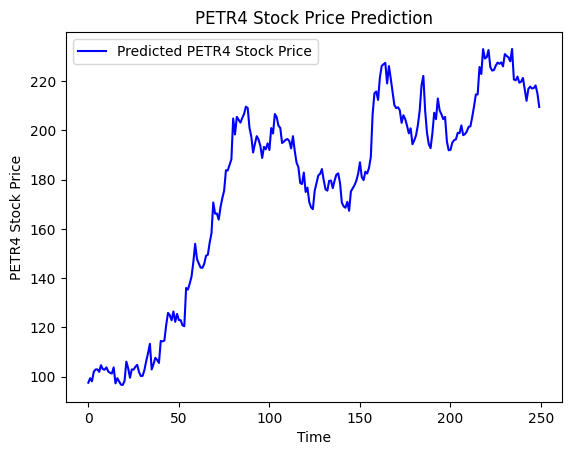

In [96]:
import matplotlib.pyplot as plt

plt.plot(valores, color = "blue", label = "Predicted PETR4 Stock Price")
plt.title("PETR4 Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("PETR4 Stock Price")
plt.legend()
plt.show()

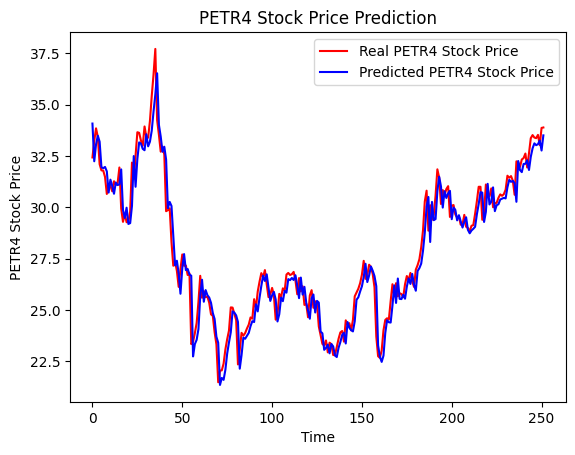

In [100]:
import matplotlib.pyplot as plt

plt.plot(df_testando['real'], color = "red", label = "Real PETR4 Stock Price")
plt.plot(df_testando['predicted'], color = "blue", label = "Predicted PETR4 Stock Price")
plt.title("PETR4 Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("PETR4 Stock Price")
plt.legend()
plt.show()